# Build a binary classifier for human versus horse

20166450 김영민

- This is given by Professor

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision
import os
import sys

from scipy.special import xlogy

import matplotlib.pyplot as plt
import numpy as np
import time


transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])

 
#train_data_path = 'relative path of training data set'
train_data_path = 'C:\\중앙대 수업자료\\MachineLearningProject\\horse-or-human\\horse-or-human\\train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = 'C:\\중앙대 수업자료\\MachineLearningProject\\horse-or-human\\horse-or-human\\validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  



In [ ]:
asdf

- This is given by Professor

In [2]:
train_labels=np.zeros(1027)
test_labels=np.zeros(256)

train_datas=np.zeros((1027,10001))
test_datas=np.zeros((256,10001))



for epoch in range(1):
    sum=0
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        inputs, labels = data
        train_labels[i]=int(labels)
        reinputs=inputs.reshape(10000)
        reinputs=np.array(reinputs)
        reinputs=np.hstack((reinputs,1))
        train_datas[i]=reinputs
        
    train_datas=train_datas.T

    for i, data in enumerate(valloader):
        sum+=1
        inputs, labels = data
        test_labels[i]=int(labels)
        reinputs=inputs.reshape(10000)
        reinputs=np.array(reinputs)
        reinputs=np.hstack((reinputs,1))
        test_datas[i]=reinputs

    test_datas=test_datas.T

        
    
    


- for calculating Accuracy of labels

In [3]:
def accuracy_func(h_,label):
    label_result=np.zeros(len(h_))
    correct=0
    
    for i in range(len(label)):
        if(h_[i]<0.5):
            label_result[i]=0
        elif(h_[i]>=0.5):
            label_result[i]=1
            
        if(label_result[i]==label[i]):
            correct+=1
    total= correct/len(label)
    
    return total

np.set_printoptions(threshold=sys.maxsize)

- set Array and epoch number.

In [33]:
NUM_EPOCH=2000

total_loss=np.zeros(NUM_EPOCH)
total_loss_test=np.zeros(NUM_EPOCH)

accuracy=np.zeros(NUM_EPOCH)
accuracy_test=np.zeros(NUM_EPOCH)

time_vector=np.zeros(NUM_EPOCH)
time_vector_v=np.zeros(NUM_EPOCH)

known_train=np.zeros((10001))
known_test=np.zeros((10001))

- Optimization
- Vertorizing Logistic Regression'c gradient Computation

In [34]:
l_rate=0.005

delta = 1e-70
for i in range(NUM_EPOCH):
    #Vectorizing Logistic Regression for train_set
    L=0
    h=0
    j=0
    tic=time.time()
    z=known_train@train_datas
    h=1.0/(1+np.exp(-z))
    j=-(xlogy(train_labels,h+delta)+xlogy(1-train_labels,1-h+delta)).sum()/1027
    L=h-train_labels
    dw=train_datas@L
    dw=dw/1027
    known_train-=l_rate*dw
    toc=time.time()
    time_vector[i]=1000*(toc-tic)
    total_loss[i]=j  
    accuracy[i]=accuracy_func(h,train_labels)
    
    #Vectorizing Logistic Regression for test_set
    L_v=0
    h_v=0
    j_v=0
    tic_v=time.time()
    z_v=known_test@test_datas
    h_v=1.0/(1.0+np.exp(-z_v))
    j_v=-(xlogy(test_labels,h_v+delta)+xlogy(1-test_labels,1-h_v+delta)).sum()/256
    L_v=h_v-test_labels
    dw_v=test_datas@L_v
    dw_v=dw_v/256
    known_test-=l_rate*dw_v
    toc_v=time.time()
    time_vector_v[i]=1000*(toc_v-tic_v)
    total_loss_test[i]=j_v
    accuracy_test[i]=accuracy_func(h_v,test_labels)

- Plot the loss of Train and Validation at every iteration
- I divdied Loss to number of datasets in order to compare 

Text(0.5, 0, 'Iteraion')

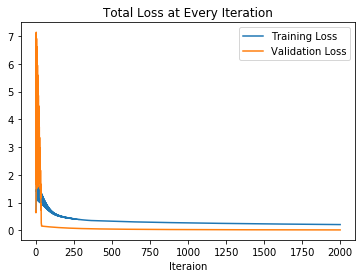

In [35]:
plt.plot(total_loss,label='Training Loss')
plt.plot(total_loss_test,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Total Loss at Every Iteration")
plt.xlabel("Iteraion")

- Plot the Accuracy of Train and Validation 

Text(0.5, 0, 'Iteraion')

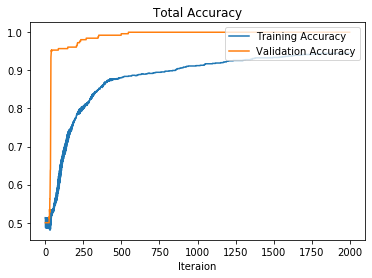

In [36]:
plt.plot(accuracy,label='Training Accuracy')
plt.plot(accuracy_test,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Total Accuracy")
plt.xlabel("Iteraion")

- Present the table for the final accuracy and loss with training and validation datasets
- Accuracy multiply 100 to present as a persent(%)

In [38]:
print("""
+-----------------------+-----------------------+--------------------+
|       Data set        |          Loss         |      Accuracy      |
+-----------------------+-----------------------+--------------------+
|       Training        |          %6.3f        |      %6.2f %%     |
+-----------------------+-----------------------+--------------------+
|      Validation       |          %6.3f        |      %6.2f %%     |
+-----------------------+-----------------------+--------------------+"""
%(total_loss[1999],accuracy[1999]*100,total_loss_test[1999],accuracy_test[1999]*100))


+-----------------------+-----------------------+--------------------+
|       Data set        |          Loss         |      Accuracy      |
+-----------------------+-----------------------+--------------------+
|       Training        |           0.206        |       94.45 %     |
+-----------------------+-----------------------+--------------------+
|      Validation       |           0.013        |      100.00 %     |
+-----------------------+-----------------------+--------------------+


- Plot the elapsed time at every iteration for the computation of the gradient and the update of model parameters (x-axis: iteration, y-axis: elapsed time)

Text(0.5, 0, 'Iteraion')

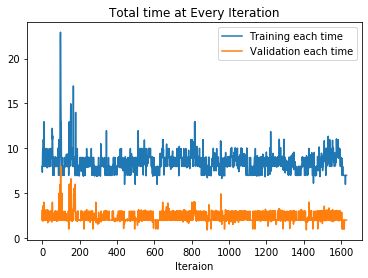

In [44]:
plt.plot(time_vector[:1630],label='Training each time')
plt.plot(time_vector_v[:1630],label='Validation each time')
plt.legend(loc='upper right')
plt.title("Total time at Every Iteration")
plt.xlabel("Iteraion")